In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 25.0MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(

 directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create cnn model
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 108ms/step - loss: 1.1807 - accuracy: 0.6064 - val_loss: 0.6354 - val_accuracy: 0.6670
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5524 - accuracy: 0.7161 - val_loss: 0.5095 - val_accuracy: 0.7466
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4879 - accuracy: 0.7640 - val_loss: 0.5092 - val_accuracy: 0.7538
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4273 - accuracy: 0.7997 - val_loss: 0.4476 - val_accuracy: 0.7866
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3558 - accuracy: 0.8396 - val_loss: 0.4623 - val_accuracy: 0.7864
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2866 - accuracy: 0.8760 - val_loss: 0.5557 - val_accuracy: 0.7244
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2080 - accuracy: 0.9155 - val_loss: 0.5277 - val_ac

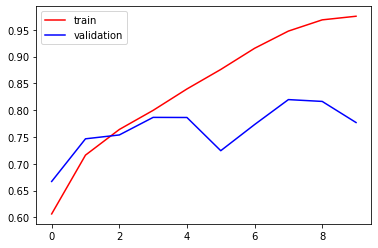

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
# add more data, data augumentation ,dropout

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import argparse
import time
import cv2

In [ ]:
test_img=cv2.imread('/content/download.jpg')

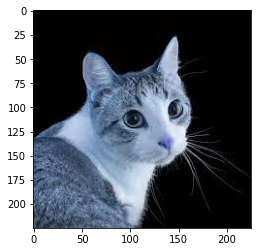

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

img=cv.imread('/content/download.jpg')
plt.imshow(img)

In [ ]:
test_img.shape

(225, 225, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)